# models comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit


# BIC and mcFadden_R2
the first way to compare models is bayesian information criterion; BICs don't have a meaning by themselves it's the delta BIC between models that decides which model in better. the model with smaller BIC explains the behavior better.
## interpretation:

about BIC difference absolute amount:
0–2: Not worth more than a bare mention
2–6: good
6–10: Strong
+10: Very strong

In [2]:
output_dir = r"19_RL_agent_TDlearn_output_model_comparison"
os.makedirs(output_dir, exist_ok=True)

file_see_colors = "16_RL_agent_TDlearn_output/models_evaluation.csv"
file_see_numbers = "17_RL_agent_TDlearn_output/models_evaluation.csv"
file_see_colors_and_numbers = "18_RL_agent_TDlearn_output/models_evaluation.csv"


df_see_colors = pd.read_csv(file_see_colors)
df_see_numbers = pd.read_csv(file_see_numbers)
df_see_colors_and_numbers = pd.read_csv(file_see_colors_and_numbers)
df_see_colors_and_numbers.head(3)

,participants,best_alpha,best_beta,BIC,accuracy,precision,sensitivity_recall,specificity,f1_score,mcFadden_r2,r2
0,18_11_2024_13_31_43,0.227935,5.971931,163.212496,0.740741,0.627451,0.666667,0.781609,0.646465,0.127014,-0.131466
1,14_11_2024_21_46_47,0.337615,5.779617,150.197849,0.807407,0.850000,0.750000,0.865672,0.796875,0.249837,0.229587
2,13_11_2024_14_45_52,0.323203,3.940142,171.297991,0.725926,0.700000,0.688525,0.756757,0.694215,0.131302,-0.106557


# BIC and R2 calculations

In [3]:
bic_see_colors = df_see_colors["BIC"]
bic_see_numbers = df_see_numbers["BIC"]
bic_sees_colors_and_numbers = df_see_colors_and_numbers["BIC"]

mcFadden_r2_see_colors = df_see_colors["mcFadden_r2"]
mcFadden_r2_see_numbers = df_see_numbers["mcFadden_r2"]
mcFadden_r2_sees_colors_and_numbers = df_see_colors_and_numbers["mcFadden_r2"]

delta_bic_see_colors_see_numbers = bic_see_colors - bic_see_numbers
delta_bic_see_colors_and_numbers_see_colors = bic_see_colors - bic_sees_colors_and_numbers
delta_bic_see_colors_and_numbers_see_numbers = bic_see_numbers - bic_sees_colors_and_numbers

delta_mcFadden_r2_see_colors_see_numbers = mcFadden_r2_see_colors - mcFadden_r2_see_numbers
delta_mcFadden_r2_see_colors_and_numbers_see_colors = mcFadden_r2_see_colors - mcFadden_r2_sees_colors_and_numbers
delta_mcFadden_r2_see_colors_and_numbers_see_numbers = mcFadden_r2_see_numbers - mcFadden_r2_sees_colors_and_numbers



# BIC and R2 calculations visualizations

Saved: 19_RL_agent_TDlearn_output_model_comparison/models_evaluation_comparison_bic_r2.pdf


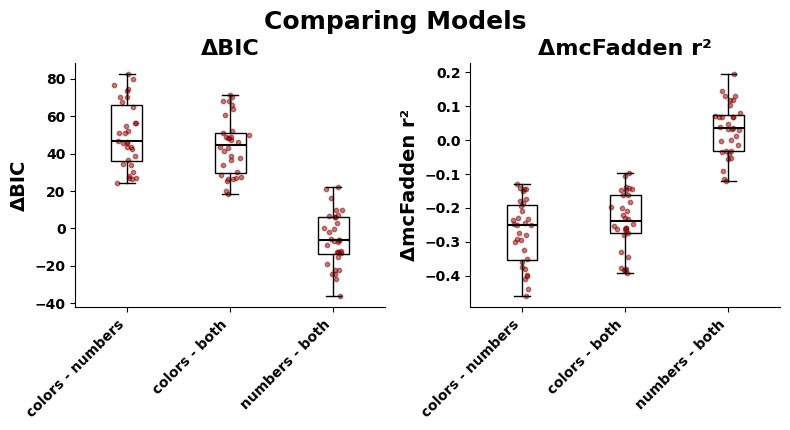

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

bic_deltas = [delta_bic_see_colors_see_numbers, delta_bic_see_colors_and_numbers_see_colors, delta_bic_see_colors_and_numbers_see_numbers]
mcFadden_r2_deltas = [delta_mcFadden_r2_see_colors_see_numbers, delta_mcFadden_r2_see_colors_and_numbers_see_colors, delta_mcFadden_r2_see_colors_and_numbers_see_numbers]

bic_labels = ["colors - numbers", "colors - both", "numbers - both"]
mcFadden_labels = ["colors - numbers", "colors - both", "numbers - both"]

box_bic = axs[0].boxplot(
    bic_deltas, vert=True, patch_artist=True, tick_labels=bic_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

box_mcFadden = axs[1].boxplot(
    mcFadden_r2_deltas, vert=True, patch_artist=True, tick_labels=mcFadden_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

for box in box_bic['boxes']:
    box.set(facecolor='none')
for box in box_mcFadden['boxes']:
    box.set(facecolor='none')


scatter_colors = ['#8b0000', '#8b0000', '#8b0000']

for i, delta in enumerate(bic_deltas):
    axs[0].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[0].set_title("ΔBIC", fontsize=16, fontweight='bold')
axs[0].set_ylabel("ΔBIC", fontsize=14, fontweight='bold')

for i, delta in enumerate(mcFadden_r2_deltas):
    axs[1].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[1].set_title("ΔmcFadden r²", fontsize=16, fontweight='bold')
axs[1].set_ylabel("ΔmcFadden r²", fontsize=14, fontweight='bold')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axs:
    ax.tick_params(axis='y', labelsize=10)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

axs[0].set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
axs[1].set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig.suptitle('Comparing Models', fontsize=18, fontweight='bold', y=0.85)

plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_comparison_bic_r2.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()


# now best alpha and best beta:

In [5]:
best_alphas_see_colors = df_see_colors["best_alpha"]
best_alphas_see_numbers = df_see_numbers["best_alpha"]
best_alphas_sees_colors_and_numbers = df_see_colors_and_numbers["best_alpha"]

best_betas_see_colors = df_see_colors["best_beta"]
best_betas_see_numbers = df_see_numbers["best_beta"]
best_betas_sees_colors_and_numbers = df_see_colors_and_numbers["best_beta"]

# visualizations

Saved: 19_RL_agent_TDlearn_output_model_comparison/models_evaluation_comparison_best_alpha_beta.pdf


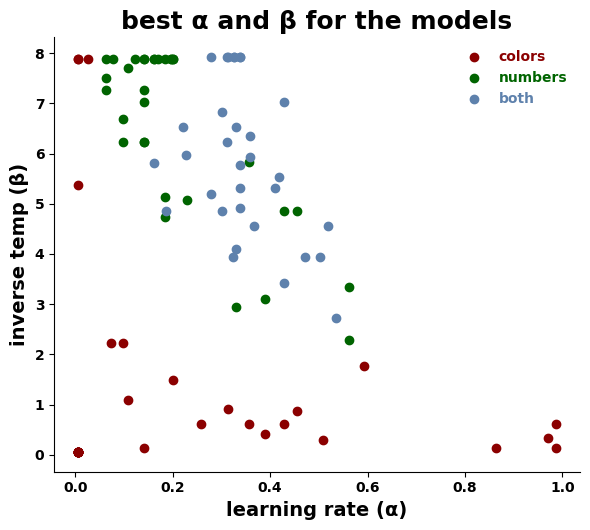

In [6]:
scatter_colors = ['#8b0000', '#006400', '#5e81ac']

alpha_values = [
    best_alphas_see_colors, 
    best_alphas_see_numbers, 
    best_alphas_sees_colors_and_numbers
]

beta_values = [
    best_betas_see_colors, 
    best_betas_see_numbers, 
    best_betas_sees_colors_and_numbers
]

labels = ['colors', 'numbers', 'both']

plt.figure(figsize=(6, 6))
for i in range(3):
    plt.scatter(alpha_values[i], beta_values[i], color=scatter_colors[i], label=labels[i])

plt.xlabel("learning rate (α)", fontsize=14, fontweight='bold')
plt.ylabel("inverse temp (β)", fontsize=14, fontweight='bold')
plt.title("best α and β for the models", fontsize=18, fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontsize= 10, fontweight='bold')
plt.yticks(fontsize= 10, fontweight='bold')

legend = plt.legend(frameon=False)
for text, color in zip(legend.get_texts(), scatter_colors):
    text.set_color(color)
    text.set_fontweight('bold')
    
plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_comparison_best_alpha_beta.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")


plt.show()
